In [44]:
# Install dependencies
# Please ensure your python environment includes all the dependencies below and which are listed in requirements.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import pearsonr
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import statsmodels.tsa.stattools as ts 
from statsmodels.stats.diagnostic import het_white
from sklearn import linear_model




In [2]:
# Load production based data
territorial_emissions = pd.read_excel('../Data/Emmissions Data.xlsx', sheet_name=0)
territorial_emissions = territorial_emissions.rename(columns={'MtC/yr': 'Year'})
territorial_emissions = territorial_emissions.set_index('Year')
territorial_emissions.head()



,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,...,Asia,Central America,Europe,Middle East,North America,Oceania,South America,Bunkers,Statistical Difference,World
Year,,,,,,,,,,,,,,,,,,,,,
1959,0.104959,0.394,1.543946,NaN,0.168830,NaN,0.008,13.359389,0.858819,0.196335,...,356.227009,11.035273,1013.054177,19.314339,839.235511,25.898496,53.765340,58.234000,3.552714e-13,2417.132824
1960,0.112960,0.552,1.678832,NaN,0.149823,NaN,0.010,13.309088,0.894362,0.168821,...,395.913772,9.886475,1081.501751,24.638551,860.628784,27.509237,54.356586,64.988958,-6.821210e-13,2562.175330
1961,0.133951,0.622,1.652817,NaN,0.123828,NaN,0.013,13.953796,0.923353,0.176188,...,355.177453,10.462966,1121.014044,25.787066,858.748376,28.241123,55.073799,71.847433,5.684342e-14,2570.587685
1962,0.187935,0.672,1.545036,NaN,0.321814,NaN,0.028,14.639772,0.970543,0.193489,...,337.271308,12.257956,1182.944420,29.829499,891.084416,29.206067,58.861940,74.493219,1.705303e-12,2661.370899
1963,0.192886,0.568,1.479027,NaN,0.313789,NaN,0.023,13.655202,1.042160,0.185341,...,355.406750,10.644867,1257.417562,33.731761,929.054815,31.176766,59.888851,77.984751,6.963319e-13,2803.463447


In [3]:
# Load consumption based data
consumption_emissions = pd.read_excel('../Data/Emmissions Data.xlsx', sheet_name=1)
consumption_emissions = consumption_emissions.rename(columns={'MtC/yr': 'Year'})
consumption_emissions = consumption_emissions.set_index('Year')
print(consumption_emissions.head(20).index.tolist())
consumption_emissions.head()

[1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978]


,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,...,Asia,Central America,Europe,Middle East,North America,Oceania,South America,Bunkers,Statistical Difference,World
Year,,,,,,,,,,,,,,,,,,,,,
1959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.234000,NaN,2417.132824
1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.988958,NaN,2562.175330
1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.847433,NaN,2570.587685
1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.493219,NaN,2661.370899
1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.984751,NaN,2803.463447


In [4]:
print(territorial_emissions.columns)

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Anguilla',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       ...
       'Asia', 'Central America', 'Europe', 'Middle East', 'North America',
       'Oceania', 'South America', 'Bunkers', 'Statistical Difference',
       'World'],
      dtype='object', length=235)


In [5]:
print(territorial_emissions['United Kingdom'])
print(territorial_emissions.head(20).index.tolist())


Year
1959    149.182896
1960    159.394110
1961    160.648144
1962    161.826282
1963    164.679493
           ...    
2016    108.989463
2017    105.776523
2018    104.227527
2019    100.712252
2020     89.997307
Name: United Kingdom, Length: 62, dtype: float64
[1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978]


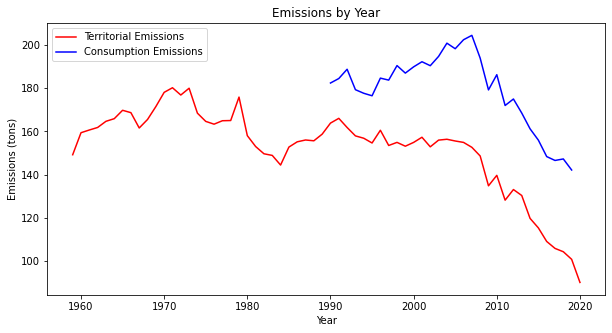

In [6]:
# Visualize production based data and consumption based data together
# Plot production based data
plt.figure(figsize=(10, 5))
plt.plot(territorial_emissions.index.values, territorial_emissions['United Kingdom'], color='red', label='Territorial Emissions')
plt.plot(consumption_emissions.index.values, consumption_emissions['United Kingdom'], color='blue', label='Consumption Emissions')
plt.legend(loc='upper left')
plt.title('Emissions by Year')
plt.xlabel('Year')
plt.ylabel('Emissions (tons)')
plt.show()


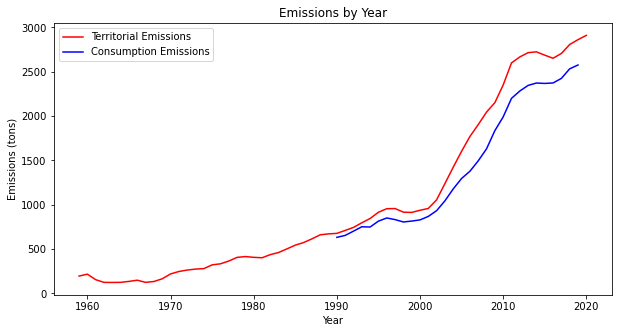

In [47]:
# Visualize production based data and consumption based data together
# Plot production based data
plt.figure(figsize=(10, 5))
plt.plot(territorial_emissions.index.values, territorial_emissions['China'], color='red', label='Territorial Emissions')
plt.plot(consumption_emissions.index.values, consumption_emissions['China'], color='blue', label='Consumption Emissions')
plt.legend(loc='upper left')
plt.title('Emissions by Year')
plt.xlabel('Year')
plt.ylabel('Emissions (tons)')
plt.show()

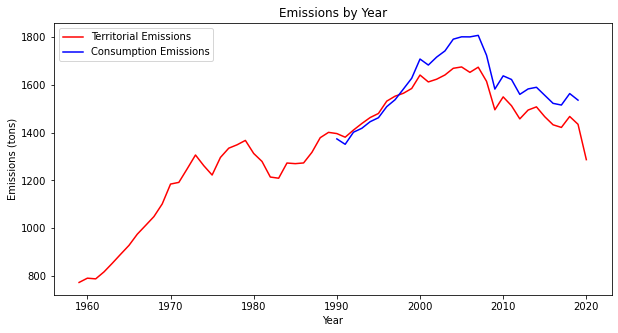

In [48]:
# Visualize production based data and consumption based data together
# Plot production based data
plt.figure(figsize=(10, 5))
plt.plot(territorial_emissions.index.values, territorial_emissions['USA'], color='red', label='Territorial Emissions')
plt.plot(consumption_emissions.index.values, consumption_emissions['USA'], color='blue', label='Consumption Emissions')
plt.legend(loc='upper left')
plt.title('Emissions by Year')
plt.xlabel('Year')
plt.ylabel('Emissions (tons)')
plt.show()

In [7]:
# Load GDP Data - Economic Growth
gdp_per_capita = pd.read_excel('../Data/GDP_per_capita_cleaned.xls')
gdp_per_capita = gdp_per_capita.transpose()
gdp_per_capita.columns = gdp_per_capita.iloc[0]
# Convert to numeric: (check works for index)
cols = gdp_per_capita.columns
gdp_per_capita[cols] = gdp_per_capita[cols].apply(pd.to_numeric, errors='coerce')
# Convert index to float64:
gdp_per_capita = gdp_per_capita.drop(gdp_per_capita.index[0])
gdp_per_capita.index = pd.to_numeric(gdp_per_capita.index)
# Set first column as index and name it 'Year'

# gdp_per_capita = gdp_per_capita.set_index(gdp_per_capita.columns[0])
gdp_per_capita = gdp_per_capita.rename(index={0: 'Year'})
gdp_per_capita = gdp_per_capita.add_suffix(' GDP')
print(gdp_per_capita.head(20).index.tolist())
print(gdp_per_capita.columns)
gdp_per_capita.head()
print(gdp_per_capita.head(20).index.tolist())

[1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979]
Index(['Aruba GDP', 'Africa Eastern and Southern GDP', 'Afghanistan GDP',
       'Africa Western and Central GDP', 'Angola GDP', 'Albania GDP',
       'Andorra GDP', 'Arab World GDP', 'United Arab Emirates GDP',
       'Argentina GDP',
       ...
       'Virgin Islands (U.S.) GDP', 'Vietnam GDP', 'Vanuatu GDP', 'World GDP',
       'Samoa GDP', 'Kosovo GDP', 'Yemen, Rep. GDP', 'South Africa GDP',
       'Zambia GDP', 'Zimbabwe GDP'],
      dtype='object', name='Country', length=266)
[1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979]


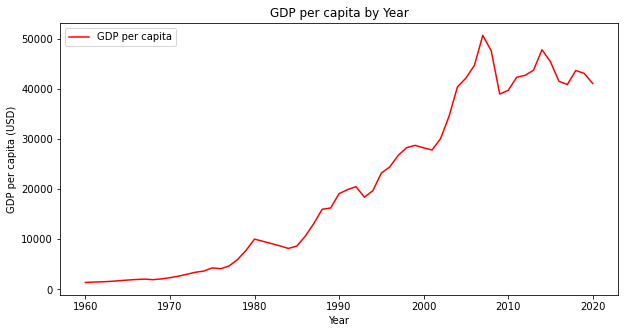

In [8]:
# Plot GDP per capita by year for the UK
plt.figure(figsize=(10, 5))
plt.plot(gdp_per_capita.index.values, gdp_per_capita['United Kingdom GDP'], color='red', label='GDP per capita')
plt.legend(loc='upper left')
plt.title('GDP per capita by Year')
plt.xlabel('Year')
plt.ylabel('GDP per capita (USD)')
plt.show()


In [9]:
# Load Income Data - Economic Growth
income_per_capita = pd.read_excel('../Data/per_capita_income.xls')
income_per_capita = income_per_capita.transpose()
income_per_capita.columns = income_per_capita.iloc[0]
# Convert to numeric: (check works for index)
cols = income_per_capita.columns
income_per_capita[cols] = income_per_capita[cols].apply(pd.to_numeric, errors='coerce')
# Convert index to float64:
income_per_capita = income_per_capita.drop(income_per_capita.index[0])
income_per_capita.index = pd.to_numeric(income_per_capita.index)
# Set first column as index and name it 'Year'

# gdp_per_capita = gdp_per_capita.set_index(gdp_per_capita.columns[0])
income_per_capita = income_per_capita.rename(index={0: 'Year'})
income_per_capita = income_per_capita.add_suffix(' Income')
print(income_per_capita.head(20).index.tolist())
print(income_per_capita.columns)
income_per_capita.head()
print(income_per_capita.head(20).index.tolist())

[1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979]
Index(['Aruba Income', 'Africa Eastern and Southern Income',
       'Afghanistan Income', 'Africa Western and Central Income',
       'Angola Income', 'Albania Income', 'Andorra Income',
       'Arab World Income', 'United Arab Emirates Income', 'Argentina Income',
       ...
       'Virgin Islands (U.S.) Income', 'Vietnam Income', 'Vanuatu Income',
       'World Income', 'Samoa Income', 'Kosovo Income', 'Yemen, Rep. Income',
       'South Africa Income', 'Zambia Income', 'Zimbabwe Income'],
      dtype='object', name='Country Name', length=266)
[1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979]


In [10]:
# Load Energy Usage Data
energy_usage_per_capita = pd.read_excel('../Data/energy_usage_per_capita.xls')
energy_usage_per_capita = energy_usage_per_capita.transpose()
energy_usage_per_capita.columns = energy_usage_per_capita.iloc[0]
# Convert to numeric: (check works for index)
cols = energy_usage_per_capita.columns
energy_usage_per_capita[cols] = energy_usage_per_capita[cols].apply(pd.to_numeric, errors='coerce')
# Convert index to float64:
energy_usage_per_capita = energy_usage_per_capita.drop(energy_usage_per_capita.index[0])
energy_usage_per_capita.index = pd.to_numeric(energy_usage_per_capita.index)
# Set first column as index and name it 'Year'

# gdp_per_capita = gdp_per_capita.set_index(gdp_per_capita.columns[0])
energy_usage_per_capita = energy_usage_per_capita.rename(index={0: 'Year'})
energy_usage_per_capita = energy_usage_per_capita.add_suffix(' Energy Usage')
print(energy_usage_per_capita.head(20).index.tolist())
print(energy_usage_per_capita.columns)
energy_usage_per_capita.head()
print(energy_usage_per_capita.head(20).index.tolist())

[1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979]
Index(['Aruba Energy Usage', 'Africa Eastern and Southern Energy Usage',
       'Afghanistan Energy Usage', 'Africa Western and Central Energy Usage',
       'Angola Energy Usage', 'Albania Energy Usage', 'Andorra Energy Usage',
       'Arab World Energy Usage', 'United Arab Emirates Energy Usage',
       'Argentina Energy Usage',
       ...
       'Virgin Islands (U.S.) Energy Usage', 'Vietnam Energy Usage',
       'Vanuatu Energy Usage', 'World Energy Usage', 'Samoa Energy Usage',
       'Kosovo Energy Usage', 'Yemen, Rep. Energy Usage',
       'South Africa Energy Usage', 'Zambia Energy Usage',
       'Zimbabwe Energy Usage'],
      dtype='object', name='Country Name', length=266)
[1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979]


In [11]:
# Load Trade Data
trade_per_capita = pd.read_excel('../Data/trade_percentage_of_gdp.xls')
trade_per_capita = trade_per_capita.transpose()
trade_per_capita.columns = trade_per_capita.iloc[0]
# Convert to numeric: (check works for index)
cols = trade_per_capita.columns
trade_per_capita[cols] = trade_per_capita[cols].apply(pd.to_numeric, errors='coerce')
# Convert index to float64:
trade_per_capita = trade_per_capita.drop(trade_per_capita.index[0])
trade_per_capita.index = pd.to_numeric(trade_per_capita.index)
# Set first column as index and name it 'Year'

# gdp_per_capita = gdp_per_capita.set_index(gdp_per_capita.columns[0])
trade_per_capita = trade_per_capita.rename(index={0: 'Year'})
trade_per_capita = trade_per_capita.add_suffix(' Trade')
print(trade_per_capita.head(20).index.tolist())
print(trade_per_capita.columns)
trade_per_capita.head()
print(trade_per_capita.head(20).index.tolist())

[1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979]
Index(['Aruba Trade', 'Africa Eastern and Southern Trade', 'Afghanistan Trade',
       'Africa Western and Central Trade', 'Angola Trade', 'Albania Trade',
       'Andorra Trade', 'Arab World Trade', 'United Arab Emirates Trade',
       'Argentina Trade',
       ...
       'Virgin Islands (U.S.) Trade', 'Vietnam Trade', 'Vanuatu Trade',
       'World Trade', 'Samoa Trade', 'Kosovo Trade', 'Yemen, Rep. Trade',
       'South Africa Trade', 'Zambia Trade', 'Zimbabwe Trade'],
      dtype='object', name='Country Name', length=266)
[1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979]


In [12]:
# Load Urbanization Data
urbanization = pd.read_excel('../Data/urbanization_growth.xls')
urbanization = urbanization.transpose()
urbanization.columns = urbanization.iloc[0]
# Convert to numeric: (check works for index)
cols = urbanization.columns
urbanization[cols] = urbanization[cols].apply(pd.to_numeric, errors='coerce')
# Convert index to float64:
urbanization = urbanization.drop(urbanization.index[0])
urbanization.index = pd.to_numeric(urbanization.index)
# Set first column as index and name it 'Year'

# gdp_per_capita = gdp_per_capita.set_index(gdp_per_capita.columns[0])
urbanization = urbanization.rename(index={0: 'Year'})
urbanization = urbanization.add_suffix(' Urbanization')
print(urbanization.head(20).index.tolist())
print(urbanization.columns)
urbanization.head()
print(urbanization.head(20).index.tolist())

[1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979]
Index(['Aruba Urbanization', 'Africa Eastern and Southern Urbanization',
       'Afghanistan Urbanization', 'Africa Western and Central Urbanization',
       'Angola Urbanization', 'Albania Urbanization', 'Andorra Urbanization',
       'Arab World Urbanization', 'United Arab Emirates Urbanization',
       'Argentina Urbanization',
       ...
       'Virgin Islands (U.S.) Urbanization', 'Vietnam Urbanization',
       'Vanuatu Urbanization', 'World Urbanization', 'Samoa Urbanization',
       'Kosovo Urbanization', 'Yemen, Rep. Urbanization',
       'South Africa Urbanization', 'Zambia Urbanization',
       'Zimbabwe Urbanization'],
      dtype='object', name='Country Name', length=266)
[1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979]


In [13]:
# print(gdp_per_capita['United Kingdom GDP'])
print(territorial_emissions['United Kingdom'])
print(gdp_per_capita['United Kingdom GDP'])

Year
1959    149.182896
1960    159.394110
1961    160.648144
1962    161.826282
1963    164.679493
           ...    
2016    108.989463
2017    105.776523
2018    104.227527
2019    100.712252
2020     89.997307
Name: United Kingdom, Length: 62, dtype: float64
1960     1397.594803
1961     1472.385714
1962     1525.775853
1963     1613.456884
1964     1748.288118
            ...     
2017    40857.755583
2018    43646.951971
2019    43070.498360
2020    41059.168809
2021             NaN
Name: United Kingdom GDP, Length: 62, dtype: float64


In [14]:
# cols = gdp_per_capita.columns

# gdp_per_capita[cols] = gdp_per_capita[cols].apply(pd.to_numeric, errors='coerce')
# print(gdp_per_capita.dtypes)
# # gdp_per_capita.index = pd.to_numeric(gdp_per_capita.index, errors='coerce')
# # Convert gdp_per_capita index to float64 type
# gdp_per_capita.index = gdp_per_capita.index.astype(float)

print(gdp_per_capita.head(20).index.tolist())

[1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979]


In [15]:
# converted_gdp = pd.to_numeric(gdp_per_capita['United Kingdom GDP'])
territorial_emissions_final = territorial_emissions.join(gdp_per_capita).join(income_per_capita).join(energy_usage_per_capita).join(trade_per_capita).join(urbanization)
print(territorial_emissions_final.head())
print(territorial_emissions_final['United Kingdom'])
print(territorial_emissions_final['United Kingdom GDP'])

      Afghanistan  Albania   Algeria  Andorra    Angola  Anguilla  \
Year                                                                
1959     0.104959    0.394  1.543946      NaN  0.168830       NaN   
1960     0.112960    0.552  1.678832      NaN  0.149823       NaN   
1961     0.133951    0.622  1.652817      NaN  0.123828       NaN   
1962     0.187935    0.672  1.545036      NaN  0.321814       NaN   
1963     0.192886    0.568  1.479027      NaN  0.313789       NaN   

      Antigua and Barbuda  Argentina   Armenia     Aruba  ...  \
Year                                                      ...   
1959                0.008  13.359389  0.858819  0.196335  ...   
1960                0.010  13.309088  0.894362  0.168821  ...   
1961                0.013  13.953796  0.923353  0.176188  ...   
1962                0.028  14.639772  0.970543  0.193489  ...   
1963                0.023  13.655202  1.042160  0.185341  ...   

      Virgin Islands (U.S.) Urbanization  Vietnam Urbanizati

In [16]:
consumption_emissions_final = consumption_emissions.join(gdp_per_capita).join(income_per_capita).join(energy_usage_per_capita).join(trade_per_capita).join(urbanization)
consumption_emissions_final.head()
print(consumption_emissions_final['United Kingdom'])
print(consumption_emissions_final['United Kingdom GDP'])

Year
1959           NaN
1960           NaN
1961           NaN
1962           NaN
1963           NaN
           ...    
2016    148.334067
2017    146.540345
2018    147.231856
2019    142.111466
2020           NaN
Name: United Kingdom, Length: 62, dtype: float64
Year
1959             NaN
1960     1397.594803
1961     1472.385714
1962     1525.775853
1963     1613.456884
            ...     
2016    41499.555703
2017    40857.755583
2018    43646.951971
2019    43070.498360
2020    41059.168809
Name: United Kingdom GDP, Length: 62, dtype: float64


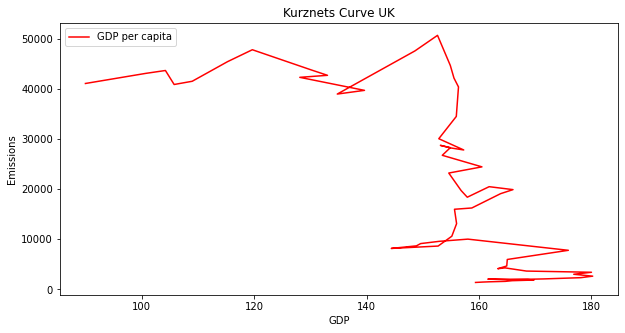

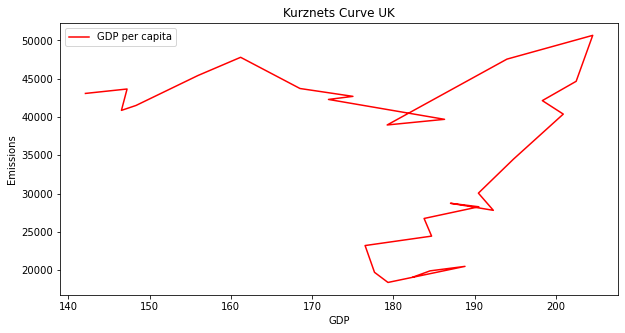

In [17]:
# Plot GDP per capita by year for the UK
plt.figure(figsize=(10, 5))
plt.plot(territorial_emissions_final['United Kingdom'], territorial_emissions_final['United Kingdom GDP'], color='red', label='GDP per capita')
plt.legend(loc='upper left')
plt.title('Kurznets Curve UK')
plt.xlabel('GDP')
plt.ylabel('Emissions')
plt.show()

# Plot GDP per capita by year for the UK
plt.figure(figsize=(10, 5))
plt.plot(consumption_emissions_final['United Kingdom'], consumption_emissions_final['United Kingdom GDP'], color='red', label='GDP per capita')
plt.legend(loc='upper left')
plt.title('Kurznets Curve UK')
plt.xlabel('GDP')
plt.ylabel('Emissions')
plt.show()

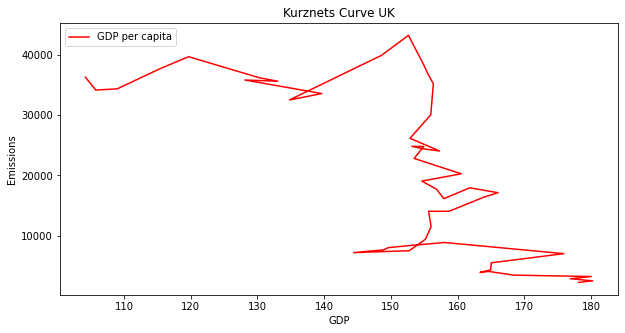

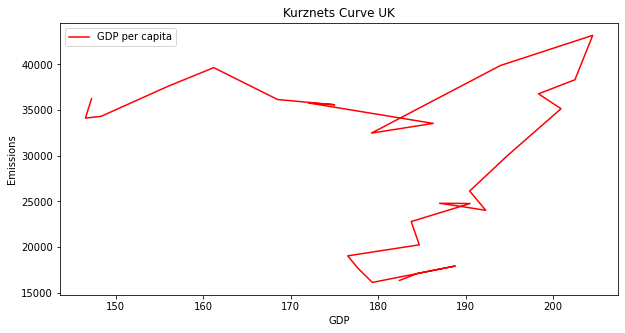

In [18]:
plt.figure(figsize=(10, 5))
plt.plot(territorial_emissions_final['United Kingdom'], territorial_emissions_final['United Kingdom Income'], color='red', label='GDP per capita')
plt.legend(loc='upper left')
plt.title('Kurznets Curve UK')
plt.xlabel('GDP')
plt.ylabel('Emissions')
plt.show()
plt.figure(figsize=(10, 5))
plt.plot(consumption_emissions_final['United Kingdom'], consumption_emissions_final['United Kingdom Income'], color='red', label='GDP per capita')
plt.legend(loc='upper left')
plt.title('Kurznets Curve UK')
plt.xlabel('GDP')
plt.ylabel('Emissions')
plt.show()

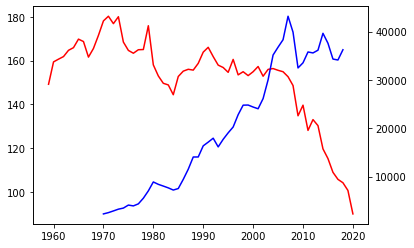

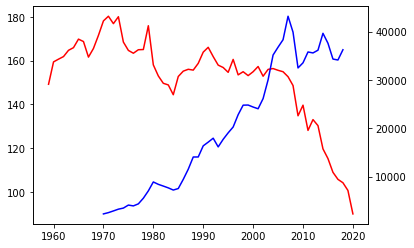

In [19]:
# Plot both United Kingdom Income and United Kingdom on the y axis with the index values of the dataframe on the x axis
fig, ax_left = plt.subplots()
ax_right = ax_left.twinx()
ax_left.plot(territorial_emissions_final.index.values, territorial_emissions_final['United Kingdom'], color='red', label='Emissions')
ax_right.plot(territorial_emissions_final.index.values, territorial_emissions_final['United Kingdom Income'], color='blue', label='GDP per capita')
plt.show()

fig, ax_left = plt.subplots()
ax_right = ax_left.twinx()
ax_left.plot(territorial_emissions_final.index.values, territorial_emissions_final['United Kingdom'], color='red', label='Emissions')
ax_right.plot(territorial_emissions_final.index.values, territorial_emissions_final['United Kingdom Income'], color='blue', label='GDP per capita')
plt.show()

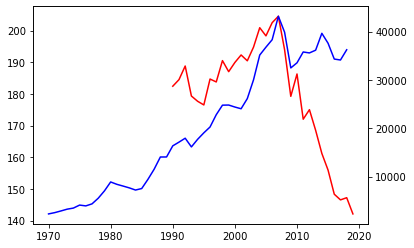

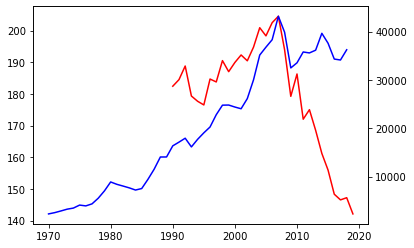

In [20]:
# Plot both United Kingdom Income and United Kingdom on the y axis with the index values of the dataframe on the x axis
fig, ax_left = plt.subplots()
ax_right = ax_left.twinx()
ax_left.plot(consumption_emissions_final.index.values, consumption_emissions_final['United Kingdom'], color='red', label='Emissions')
ax_right.plot(consumption_emissions_final.index.values, consumption_emissions_final['United Kingdom Income'], color='blue', label='GDP per capita')
plt.show()

fig, ax_left = plt.subplots()
ax_right = ax_left.twinx()
ax_left.plot(consumption_emissions_final.index.values, consumption_emissions_final['United Kingdom'], color='red', label='Emissions')
ax_right.plot(consumption_emissions_final.index.values, consumption_emissions_final['United Kingdom Income'], color='blue', label='GDP per capita')
plt.show()

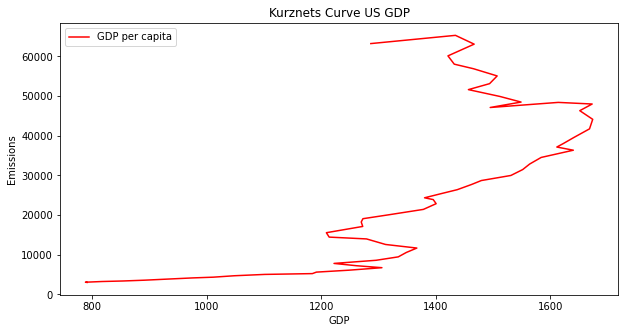

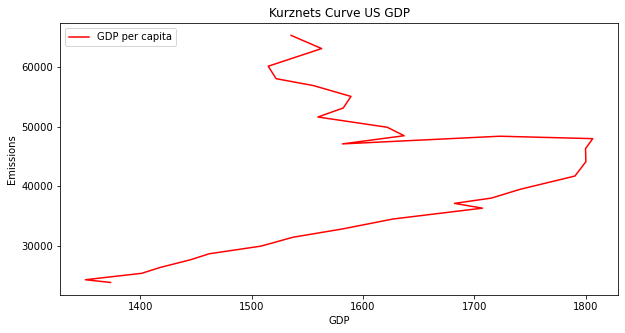

In [21]:
# Plot GDP per capita by year for the UK
plt.figure(figsize=(10, 5))
plt.plot(territorial_emissions_final['USA'], territorial_emissions_final['United States GDP'], color='red', label='GDP per capita')
plt.legend(loc='upper left')
plt.title('Kurznets Curve US GDP')
plt.xlabel('GDP')
plt.ylabel('Emissions')
plt.show()
# Plot GDP per capita by year for the UK
plt.figure(figsize=(10, 5))
plt.plot(consumption_emissions_final['USA'], consumption_emissions_final['United States GDP'], color='red', label='GDP per capita')
plt.legend(loc='upper left')
plt.title('Kurznets Curve US GDP')
plt.xlabel('GDP')
plt.ylabel('Emissions')
plt.show()

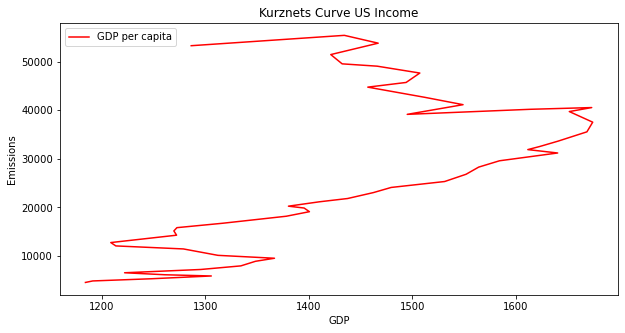

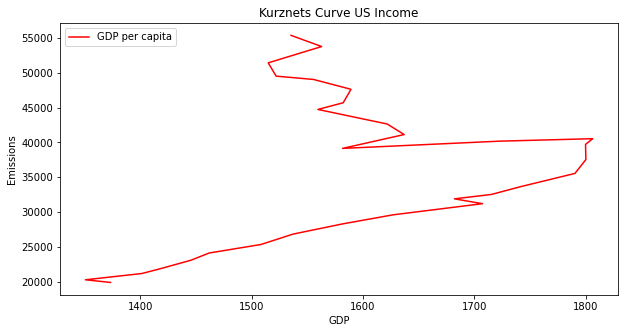

In [22]:
# Plot GDP per capita by year for the UK
plt.figure(figsize=(10, 5))
plt.plot(territorial_emissions_final['USA'], territorial_emissions_final['United States Income'], color='red', label='GDP per capita')
plt.legend(loc='upper left')
plt.title('Kurznets Curve US Income')
plt.xlabel('GDP')
plt.ylabel('Emissions')
plt.show()
# Plot GDP per capita by year for the UK
plt.figure(figsize=(10, 5))
plt.plot(consumption_emissions_final['USA'], consumption_emissions_final['United States Income'], color='red', label='GDP per capita')
plt.legend(loc='upper left')
plt.title('Kurznets Curve US Income')
plt.xlabel('GDP')
plt.ylabel('Emissions')
plt.show()

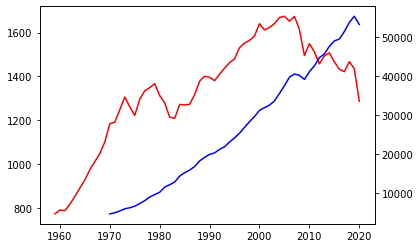

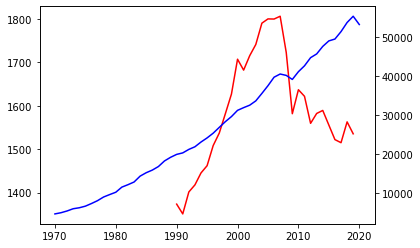

In [23]:
# Plot both United Kingdom Income and United Kingdom on the y axis with the index values of the dataframe on the x axis
fig, ax_left = plt.subplots()
ax_right = ax_left.twinx()
ax_left.plot(territorial_emissions_final.index.values, territorial_emissions_final['USA'], color='red', label='Emissions')
ax_right.plot(territorial_emissions_final.index.values, territorial_emissions_final['United States Income'], color='blue', label='GDP per capita')
plt.show()

fig, ax_left = plt.subplots()
ax_right = ax_left.twinx()
ax_left.plot(consumption_emissions_final.index.values, consumption_emissions_final['USA'], color='red', label='Emissions')
ax_right.plot(consumption_emissions_final.index.values, consumption_emissions_final['United States Income'], color='blue', label='GDP per capita')
plt.show()


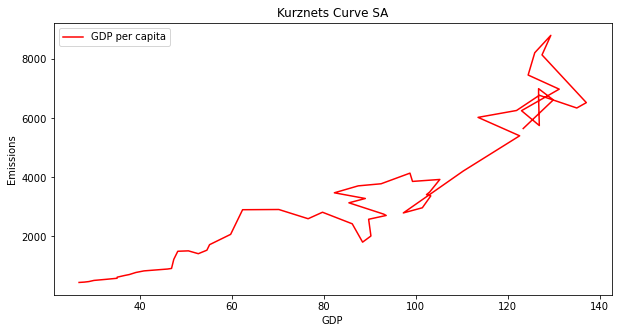

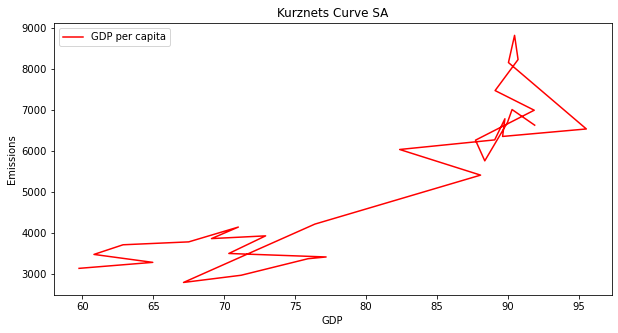

In [24]:
# Plot GDP per capita by year for the UK
plt.figure(figsize=(10, 5))
plt.plot(territorial_emissions_final['South Africa'], territorial_emissions_final['South Africa GDP'], color='red', label='GDP per capita')
plt.legend(loc='upper left')
plt.title('Kurznets Curve SA')
plt.xlabel('GDP')
plt.ylabel('Emissions')
plt.show()
# Plot GDP per capita by year for the UK
plt.figure(figsize=(10, 5))
plt.plot(consumption_emissions_final['South Africa'], consumption_emissions_final['South Africa GDP'], color='red', label='GDP per capita')
plt.legend(loc='upper left')
plt.title('Kurznets Curve SA')
plt.xlabel('GDP')
plt.ylabel('Emissions')
plt.show()

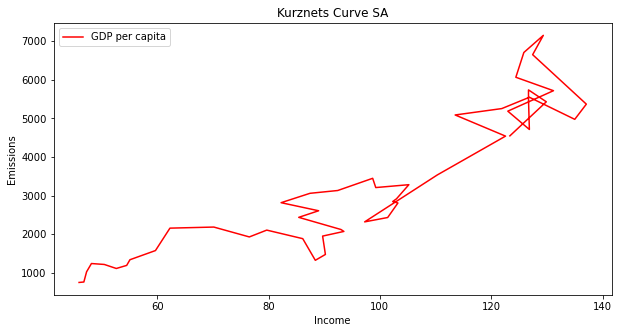

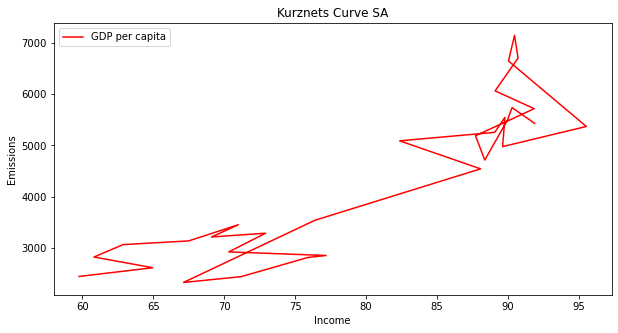

In [25]:
# Plot GDP per capita by year for the UK
plt.figure(figsize=(10, 5))
plt.plot(territorial_emissions_final['South Africa'], territorial_emissions_final['South Africa Income'], color='red', label='GDP per capita')
plt.legend(loc='upper left')
plt.title('Kurznets Curve SA')
plt.xlabel('Income')
plt.ylabel('Emissions')
plt.show()
# Plot GDP per capita by year for the UK
plt.figure(figsize=(10, 5))
plt.plot(consumption_emissions_final['South Africa'], consumption_emissions_final['South Africa Income'], color='red', label='GDP per capita')
plt.legend(loc='upper left')
plt.title('Kurznets Curve SA')
plt.xlabel('Income')
plt.ylabel('Emissions')
plt.show()

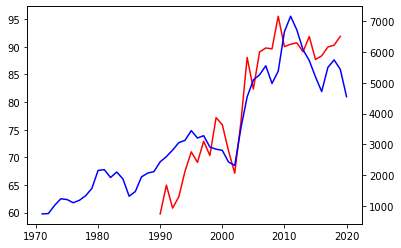

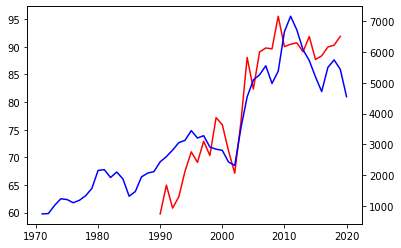

In [26]:
# Plot both United Kingdom Income and United Kingdom on the y axis with the index values of the dataframe on the x axis
fig, ax_left = plt.subplots()
ax_right = ax_left.twinx()
ax_left.plot(consumption_emissions_final.index.values, consumption_emissions_final['South Africa'], color='red', label='Emissions')
ax_right.plot(consumption_emissions_final.index.values, consumption_emissions_final['South Africa Income'], color='blue', label='GDP per capita')
plt.show()

fig, ax_left = plt.subplots()
ax_right = ax_left.twinx()
ax_left.plot(consumption_emissions_final.index.values, consumption_emissions_final['South Africa'], color='red', label='Emissions')
ax_right.plot(consumption_emissions_final.index.values, consumption_emissions_final['South Africa Income'], color='blue', label='GDP per capita')
plt.show()

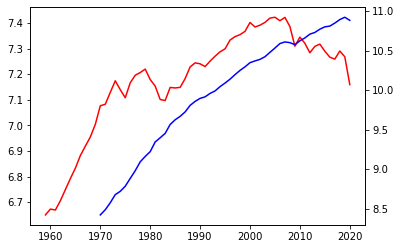

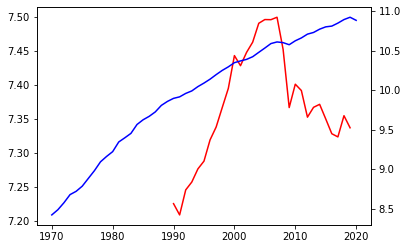

In [27]:
# Natural log of emissions, gdp and income
cols = territorial_emissions_final.columns
territorial_emissions_final[cols] = territorial_emissions_final[cols].apply(np.log, errors='coerce')

# consumption_emissions_final
cols = consumption_emissions_final.columns
consumption_emissions_final[cols] = consumption_emissions_final[cols].apply(np.log, errors='coerce')

# Plot both United Kingdom Income and United Kingdom on the y axis with the index values of the dataframe on the x axis
fig, ax_left = plt.subplots()
ax_right = ax_left.twinx()
ax_left.plot(territorial_emissions_final.index.values, territorial_emissions_final['USA'], color='red', label='Emissions')
ax_right.plot(territorial_emissions_final.index.values, territorial_emissions_final['United States Income'], color='blue', label='GDP per capita')
plt.show()

fig, ax_left = plt.subplots()
ax_right = ax_left.twinx()
ax_left.plot(consumption_emissions_final.index.values, consumption_emissions_final['USA'], color='red', label='Emissions')
ax_right.plot(consumption_emissions_final.index.values, consumption_emissions_final['United States Income'], color='blue', label='GDP per capita')
plt.show()


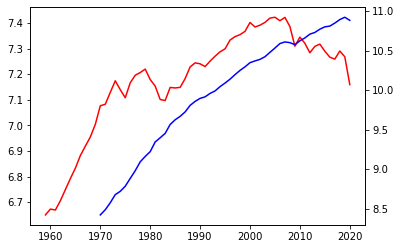

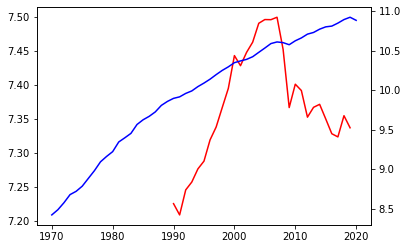

In [28]:
# Plot both United Kingdom Income and United Kingdom on the y axis with the index values of the dataframe on the x axis
fig, ax_left = plt.subplots()
ax_right = ax_left.twinx()
ax_left.plot(territorial_emissions_final.index.values, territorial_emissions_final['USA'], color='red', label='Emissions')
ax_right.plot(territorial_emissions_final.index.values, territorial_emissions_final['United States Income'], color='blue', label='GDP per capita')
plt.show()

fig, ax_left = plt.subplots()
ax_right = ax_left.twinx()
ax_left.plot(consumption_emissions_final.index.values, consumption_emissions_final['USA'], color='red', label='Emissions')
ax_right.plot(consumption_emissions_final.index.values, consumption_emissions_final['United States Income'], color='blue', label='GDP per capita')
plt.show()

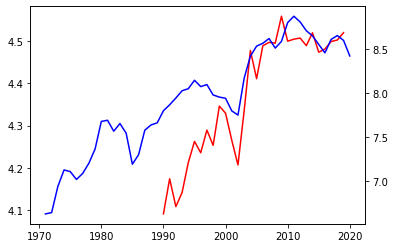

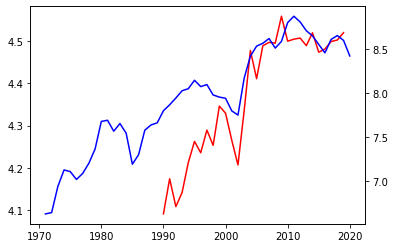

In [29]:
# Plot both United Kingdom Income and United Kingdom on the y axis with the index values of the dataframe on the x axis
fig, ax_left = plt.subplots()
ax_right = ax_left.twinx()
ax_left.plot(consumption_emissions_final.index.values, consumption_emissions_final['South Africa'], color='red', label='Emissions')
ax_right.plot(consumption_emissions_final.index.values, consumption_emissions_final['South Africa Income'], color='blue', label='GDP per capita')
plt.show()

fig, ax_left = plt.subplots()
ax_right = ax_left.twinx()
ax_left.plot(consumption_emissions_final.index.values, consumption_emissions_final['South Africa'], color='red', label='Emissions')
ax_right.plot(consumption_emissions_final.index.values, consumption_emissions_final['South Africa Income'], color='blue', label='GDP per capita')
plt.show()

In [30]:
territorial_uk_emissions = territorial_emissions_final.loc[:, territorial_emissions_final.columns.intersection(['United Kingdom','United Kingdom GDP','United Kingdom Income','United Kingdom Energy Usage','United Kingdom Trade','United Kingdom Urbanization'])]
print(territorial_uk_emissions.head())
territorial_uk_emissions = territorial_uk_emissions.dropna()
print(territorial_uk_emissions.head())
X = territorial_uk_emissions['United Kingdom GDP']
y = territorial_uk_emissions['United Kingdom']
model = sm.OLS(y, X).fit()
print(model.summary())

consumption_emissions_uk = consumption_emissions_final.loc[:, consumption_emissions_final.columns.intersection(['United Kingdom','United Kingdom GDP','United Kingdom Income','United Kingdom Energy Usage','United Kingdom Trade','United Kingdom Urbanization'])]
print(consumption_emissions_uk.head())
consumption_emissions_uk = consumption_emissions_uk.dropna()
print(consumption_emissions_uk.head())
X = consumption_emissions_uk['United Kingdom GDP']
y = consumption_emissions_uk['United Kingdom']
model = sm.OLS(y, X).fit()
print(model.summary())

      United Kingdom  United Kingdom GDP  United Kingdom Income  \
Year                                                              
1959        5.005173                 NaN                    NaN   
1960        5.071380            7.242508                    NaN   
1961        5.079217            7.294639                    NaN   
1962        5.086523            7.330258                    NaN   
1963        5.104001            7.386134                    NaN   

      United Kingdom Energy Usage  United Kingdom Trade  \
Year                                                      
1959                          NaN                   NaN   
1960                     7.788269                   NaN   
1961                     7.845296                   NaN   
1962                     7.930443                   NaN   
1963                     8.007063                   NaN   

      United Kingdom Urbanization  
Year                               
1959                          NaN  
1960    

In [31]:
# calculate Pearson's correlation
corr, _ = pearsonr(territorial_uk_emissions['United Kingdom'], territorial_uk_emissions['United Kingdom GDP'])
print('Pearsons correlation: %.3f' % corr)
print('P value: %.3f' % _)
# Should be -0.614 I think, changed when added in all the data (probably because of dropped nan values)

Pearsons correlation: -0.712
P value: 0.000


In [32]:
# calculate Pearson's correlation for consumption
corr, _ = pearsonr(consumption_emissions_uk['United Kingdom'], consumption_emissions_uk['United Kingdom GDP'])
print('Pearsons correlation: %.3f' % corr)
print('P value: %.3f' % _)


Pearsons correlation: 0.109
P value: 0.604


In [33]:
C = np.corrcoef(territorial_uk_emissions['United Kingdom'], territorial_uk_emissions['United Kingdom GDP'])
print(C)


[[ 1.         -0.71216697]
 [-0.71216697  1.        ]]


                             United Kingdom  United Kingdom GDP  \
United Kingdom                     1.000000           -0.712167   
United Kingdom GDP                -0.712167            1.000000   
United Kingdom Income             -0.706998            0.999766   
United Kingdom Energy Usage       -0.398636            0.902773   
United Kingdom Trade              -0.655961            0.383478   
United Kingdom Urbanization       -0.505067            0.690242   

                             United Kingdom Income  \
United Kingdom                           -0.706998   
United Kingdom GDP                        0.999766   
United Kingdom Income                     1.000000   
United Kingdom Energy Usage               0.906555   
United Kingdom Trade                      0.381861   
United Kingdom Urbanization               0.696696   

                             United Kingdom Energy Usage  \
United Kingdom                                 -0.398636   
United Kingdom GDP             

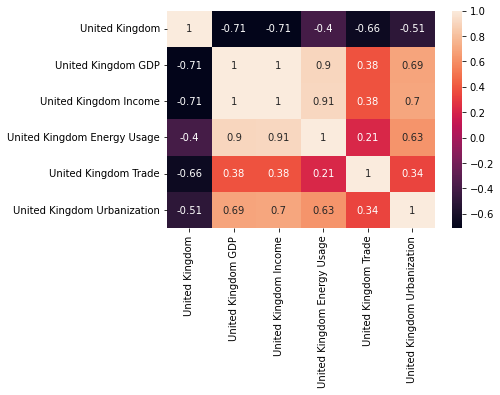

In [34]:
correlation_mat = territorial_uk_emissions.corr(method='pearson', min_periods=1)
print(correlation_mat)

sns.heatmap(correlation_mat, annot = True)

plt.show()


In [35]:
# ADF Unit Root Test 
# Still need to determine ideal lag
result = adfuller(territorial_uk_emissions['United Kingdom'])
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')    

result = adfuller(consumption_emissions_uk['United Kingdom'])
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')    

ADF Statistic: -0.27625180486502343
n_lags: 0.9288010929194027
p-value: 0.9288010929194027
Critial Values:
   1%, -3.596635636000432
Critial Values:
   5%, -2.933297331821618
Critial Values:
   10%, -2.6049909750566895
ADF Statistic: -0.5285655751388648
n_lags: 0.8863205461905714
p-value: 0.8863205461905714
Critial Values:
   1%, -3.7377092158564813
Critial Values:
   5%, -2.9922162731481485
Critial Values:
   10%, -2.635746736111111


In [36]:
# Need to do it with multiple variables: df.corr(method='pearson', min_periods=1)
# Compute pairwise correlation of columns, excluding NA/null values



In [37]:
# Co-integration Tests
result = ts.coint(territorial_uk_emissions['United Kingdom'], territorial_uk_emissions['United Kingdom GDP'])
print(result)

(-1.2201656009293036, 0.8525411376219372, array([-4.17620576, -3.48547649, -3.1469729 ]))


In [45]:
# Regression 
y = territorial_uk_emissions['United Kingdom']
x = territorial_uk_emissions.drop(['United Kingdom'], axis=1).drop(['United Kingdom Income'], axis=1)
model = sm.OLS(y, x).fit()
print(model.summary())


                                 OLS Regression Results                                
Dep. Variable:         United Kingdom   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.890e+05
Date:                Sun, 15 May 2022   Prob (F-statistic):                    1.28e-86
Time:                        15:36:16   Log-Likelihood:                          90.763
No. Observations:                  43   AIC:                                     -173.5
Df Residuals:                      39   BIC:                                     -166.5
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------

In [46]:
# Regression 
y = consumption_emissions_uk['United Kingdom']
x = consumption_emissions_uk.drop(['United Kingdom'], axis=1).drop(['United Kingdom Income'], axis=1)
model = sm.OLS(y, x).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:         United Kingdom   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.624e+05
Date:                Sun, 15 May 2022   Prob (F-statistic):                    5.29e-49
Time:                        15:37:54   Log-Likelihood:                          58.439
No. Observations:                  25   AIC:                                     -108.9
Df Residuals:                      21   BIC:                                     -104.0
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------

In [38]:
# How to Perform White's Test in Python (Step-by-Step) - White General Heteroscedasticity Test.
# Step 1: Load Data. ...
# Step 2: Fit Regression Model. ...
# Step 3: Perform White's Test.


In [39]:
# before this do descriptive analysis

In [40]:
# Make the heatmap show statistical significance as the heatmap? or seperate calculate_pvalues(df) 
# def calculate_pvalues(df):
#     df = df.dropna()._get_numeric_data()
#     dfcols = pd.DataFrame(columns=df.columns)
#     pvalues = dfcols.transpose().join(dfcols, how='outer')
#     for r in df.columns:
#         for c in df.columns:
#             pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
#     return pvalues
# correlation_mat = calculate_pvalues(territorial_uk_emissions)

# sns.heatmap(correlation_mat, annot = True)

# plt.show()



In [41]:
# Show one example above and whether fits Kurznets model and then run for all

In [42]:
# Kurznets Curve Model


In [43]:
# Need to also do Per Capita Income


In [ ]:
# Graph economic trade and the emissions trade to see if they correlate and are at the same time or whatever (Graph emission trade from emissions excel )
# Add emissions trade as variable in the territorial emission regression to test
